In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
data=pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:

data = data.rename(columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)': 'Score'})

In [ ]:
data.head()

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data_short=data[['Income', 'Score']]

In [ ]:
data_short.head()

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
k= range(1,13)
wss=[]
for i in k:
  kmeans=KMeans(n_clusters=i, init="k-means++", random_state=200)
  kmeans=kmeans.fit(data_short)
  wss_iter=kmeans.inertia_
  wss.append(wss_iter)

<Axes: xlabel='Clusters', ylabel='WSS'>

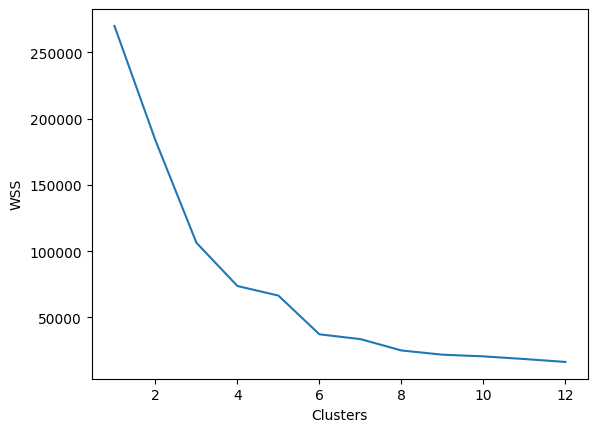

In [ ]:
elbow=pd.DataFrame({"Clusters": k, "WSS": wss})
sns.lineplot(x="Clusters", y="WSS", data=elbow)

In [ ]:
print(elbow)

    Clusters            WSS
0          1  269981.280000
1          2  183653.328947
2          3  106348.373062
3          4   73679.789039
4          5   66465.148102
5          6   37233.814511
6          7   33610.528527
7          8   25043.890043
8          9   21850.165283
9         10   20593.062537
10        11   18578.567017
11        12   16393.086930


In [ ]:
SK=range(3,13)
sil_score=[]
for i in SK:
  labels=KMeans(n_clusters=i, init="k-means++", random_state=200).fit(data_short).labels_
  score=metrics.silhouette_score(data_short, labels, metric="manhattan")
  sil_score.append(score)
  print("Silhouette Score for k={}", str(i))
  print(score)

Silhouette Score for k={} 3
0.46142131592043545
Silhouette Score for k={} 4
0.4903687750499345
Silhouette Score for k={} 5
0.45421340943383387
Silhouette Score for k={} 6
0.5546920762994675
Silhouette Score for k={} 7
0.5069669814927217
Silhouette Score for k={} 8
0.4595663086708585
Silhouette Score for k={} 9
0.4588087522192439
Silhouette Score for k={} 10
0.4255651672066593
Silhouette Score for k={} 11
0.413784490095793
Silhouette Score for k={} 12
0.40787342550840366


In [ ]:
silhouette_scores=pd.DataFrame({"Clusters":SK, "Score": sil_score})

In [ ]:
print(silhouette_scores)

   Clusters     Score
0         3  0.461421
1         4  0.490369
2         5  0.454213
3         6  0.554692
4         7  0.506967
5         8  0.459566
6         9  0.458809
7        10  0.425565
8        11  0.413784
9        12  0.407873


<Axes: xlabel='Clusters', ylabel='Score'>

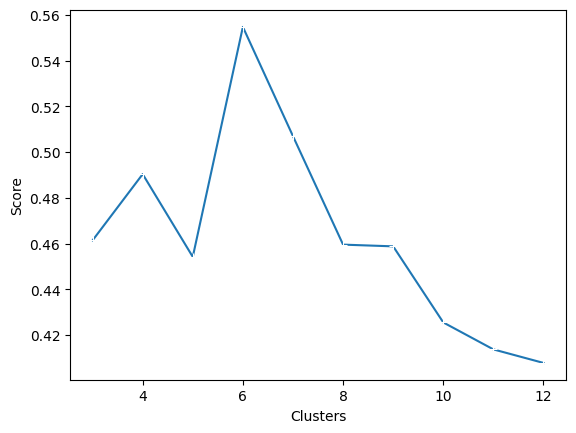

In [ ]:
sns.lineplot(x="Clusters", y="Score", data=silhouette_scores, marker='+')

In [ ]:
kmeans=KMeans(n_clusters=6, init="k-means++", random_state=200)
clusters=kmeans.fit(data_short)

<Axes: xlabel='Income', ylabel='Score'>

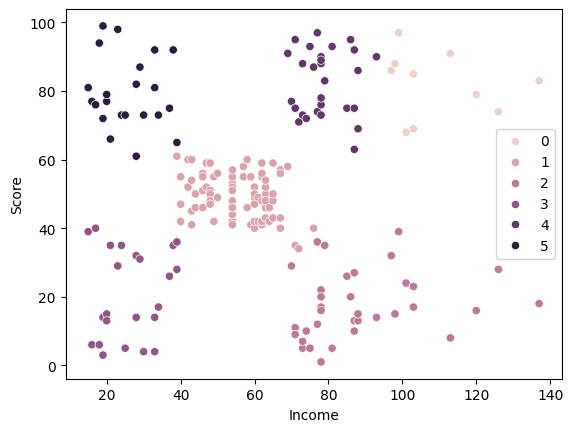

In [ ]:
sns.scatterplot(x="Income", y="Score", data=data_short, hue=clusters.labels_)